<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/PCA_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np

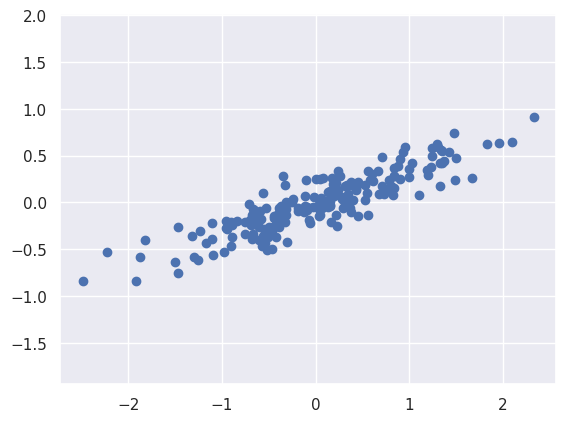

In [6]:
rng = np.random.RandomState(1)
x= np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(x[:, 0],x[:, 1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

**The fit learns some quantities from the data, most importantly the "components" and "explained variance"**

In [8]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [9]:
pca.explained_variance_

array([0.7625315, 0.0184779])

**Let's Visualise**
*components* = 'direction of vector' ,
  *explained_variances* = 'squared length of vectors'

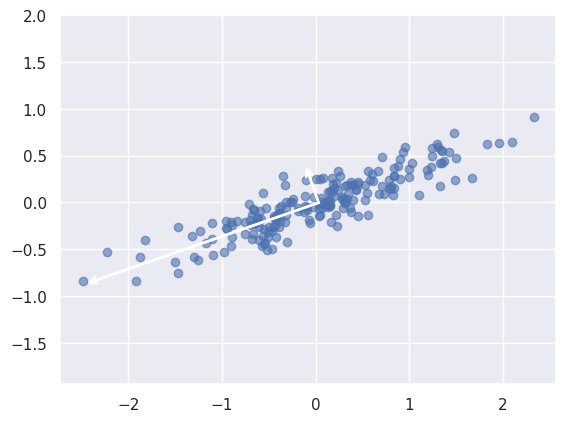

In [15]:
def draw_vector(v0,v1, ax=None):
  ax= ax or plt.gca()
  arrow_props = dict(arrowstyle='->',linewidth=2,shrinkA = 0, shrinkB=0)
  ax.annotate('',v1,v0, arrowprops =arrow_props )

#plot data
plt.scatter(x[:, 0],x[:, 1],alpha=0.6)
for length, vector in zip(pca.explained_variance_,pca.components_):
  v= vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

In [25]:
pca =PCA(n_components= 1)
pca.fit(x)


PCA(n_components=1)

In [26]:
x_pca = pca.transform(x)
x_pca

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

In [27]:
print('Original Shape', x.shape)

Original Shape (200, 2)


In [28]:
print('Transform shape',x_pca.shape) #The transformed data has been reduced to a single dimension

Transform shape (200, 1)


 **perform the inverse transform of this reduced data and plot it along with the original data**:

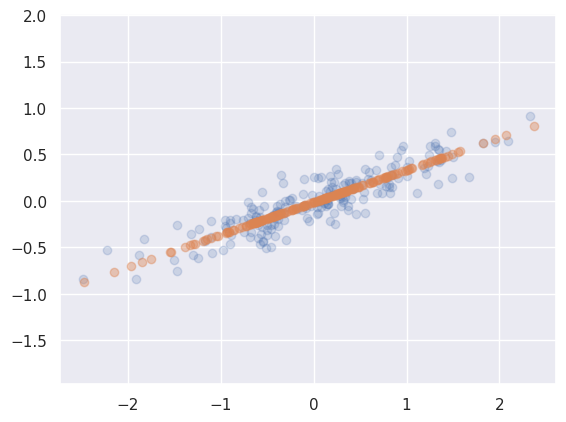

In [30]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0],x[:, 1],alpha =0.2)
plt.scatter(x_new[:, 0],x_new[:, 1],alpha = 0.4)
plt.axis('equal');
#The light points are the original data, while the dark points are the projected version

# **PCA for visualization: Hand-written digits**

*data consists of 8×8 pixel images, meaning that they are 64-dimensional*



In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [33]:
pca = PCA(2)      #projects from 64 dimensions to 2 dimensions
projected = pca.fit_transform(digits.data)

In [34]:
print(digits.data.shape)

(1797, 64)


In [35]:
print(projected.data.shape)

(1797, 2)


<ipython-input-38-1d92da12b95c>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0],projected[:, 1],c=digits.target,edgecolor=None,alpha=0.3 ,cmap =plt.cm.get_cmap('gist_rainbow',10) )


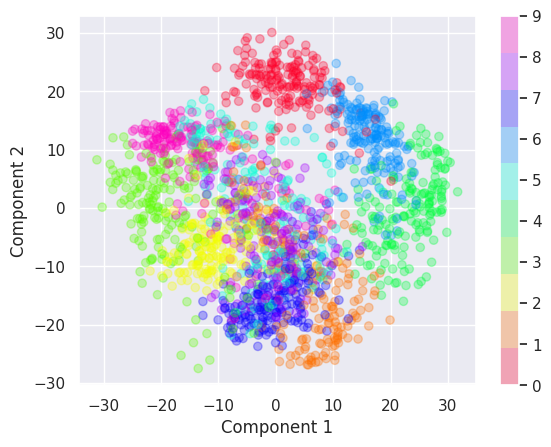

In [38]:
plt.scatter(projected[:, 0],projected[:, 1],c=digits.target,edgecolor=None,alpha=0.3 ,cmap =plt.cm.get_cmap('gist_rainbow',10) )
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

**Choosing the number of components**

Text(0, 0.5, 'Explained Variance Ratio')

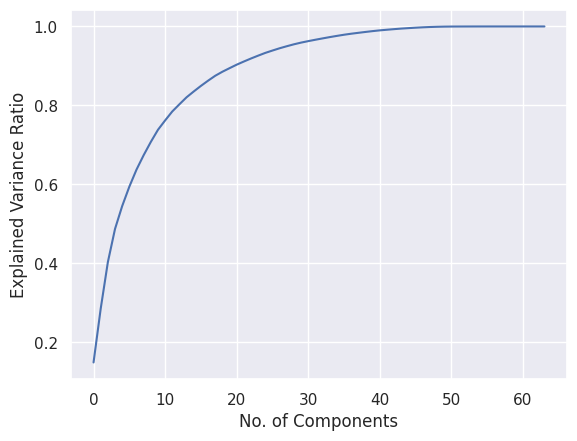

In [39]:
pca =PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance Ratio')

# **PCA as Noise Filtering**

**Let's see how this looks with the digits data. First we will plot several of the input noise-free data**

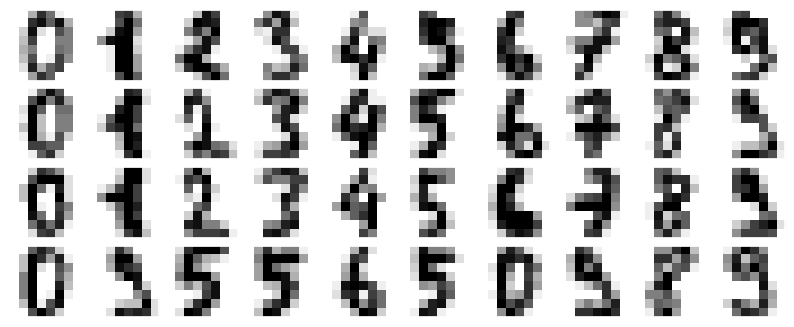

In [43]:
def plot_digits(data):
  fig, axes =plt.subplots(4 ,10 ,figsize =(10,4),
                          subplot_kw={'xticks':[],'yticks':[]},
                          gridspec_kw=dict(hspace=0.1,wspace=0.1))

  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),
              cmap='binary',interpolation='nearest',clim=(0,16))

plot_digits(digits.data)

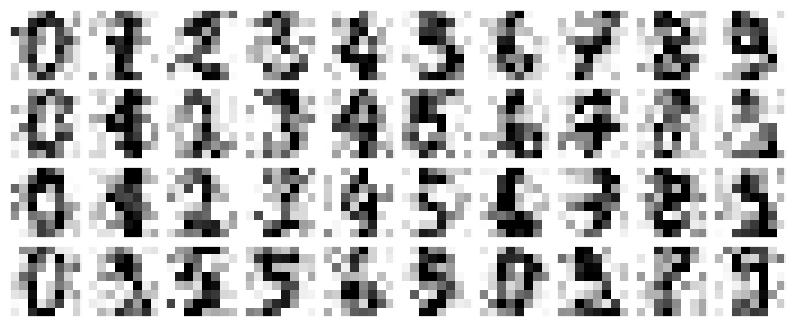

In [49]:
np.random.seed(50)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

**Here 50% of the variance amounts to 12 principal components and  Here 70% of the variance amounts to 26 principal components**

In [52]:
pca =PCA(0.70).fit(noisy)
pca.n_components_

26

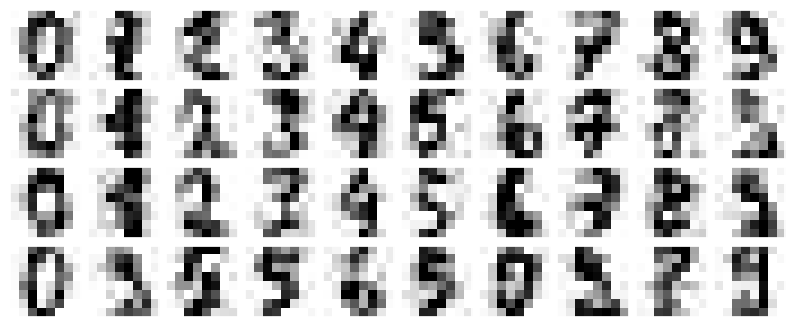

In [54]:
components=pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

*This signal preserving/noise filtering property makes PCA a very useful feature selection routine—**for example**, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.*

# **Example: Eigenfaces**

In [55]:
from sklearn.datasets import fetch_lfw_people # Labeled Faces in the Wild

In [58]:
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


In [67]:
from sklearn.decomposition import PCA
pca =PCA(n_components=150, svd_solver='randomized',iterated_power=3, random_state=None, whiten=False)
pca.fit(faces.data)

PCA(iterated_power=3, n_components=150, svd_solver='randomized')

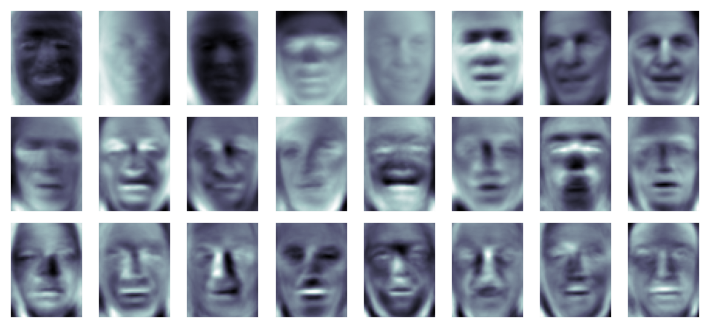

In [68]:
fig,axes=plt.subplots(3,8 ,figsize =(9,4),
                      subplot_kw ={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

Text(0, 0.5, 'Explained Variance Ratio')

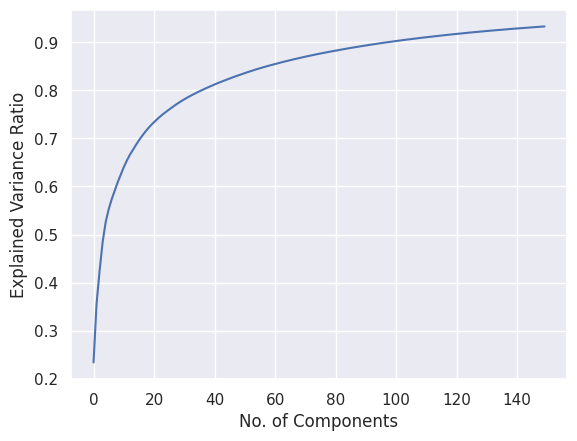

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance Ratio')

In [71]:
pca=PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

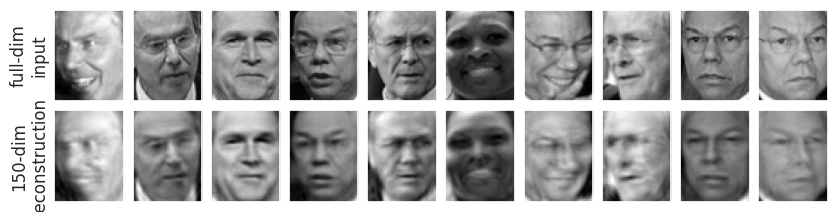

In [74]:
fig, ax =plt.subplots(2,10, figsize=(10,2.5),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62,47),cmap = 'binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');